<a href="https://colab.research.google.com/github/Fiiila/Other_stuff/blob/main/Zpracovani-obr/Augmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Rozšiřování datasetu o modifikace již nasbíraných dat

In [ ]:
#import potrebnych knihoven
import numpy as np
from google.colab import files
import matplotlib.image as img 
import matplotlib.pyplot as plt


imported_pic = files.upload()

Saving photographer.jpg to photographer.jpg


In [ ]:
#vypsani klicu slovniku nactenych obrazku
print('Vyber nazev z nactenych obrazku... '+str(imported_pic.keys()))  

#cyklus pro ulozeni jednoho nacteneho obrazku do promenne picName
while(True):
  picName = input('Zadej jeden z nazvu nactenych obrazku: ')          #zazadani o ucivatelsky vstup
  if(picName in imported_pic.keys()):                                  #overeni, zdali byl obrazek zadaneho jmena nacten
    print('Ke zpracovani vybran obrazek: '+picName)                   #Vypsani, ze obrazek byl vybran z klicu slovniku a ukonceni while cyklu
    break
  else:
    print('Zadan soubor, ktery nebyl nacten.\nZadej znovu...')        #pri nespravnem uzivatelskem vstupu se cyklus opakuje stale dokola

#nacteni obrazku do promenne a zjisteni jeho rozmeru
img = img.imread(picName)
np.shape(img)

Vyber nazev z nactenych obrazku... dict_keys(['photographer.jpg'])
Zadej jeden z nazvu nactenych obrazku: photographer.jpg
Ke zpracovani vybran obrazek: photographer.jpg


(1280, 1920, 3)

## Rescaling

> převedení obrázku z hodnot **0-255** na rozmezí **0-1**

Maximalni a minimalni hodnota v ORIGINALNIM obrazku:
max: 255
min: 0

Maximalni a minimalni hodnota v RESCALOVANEM obrazku:
max: 1.0
min: 0.0
Rozmery zustavaji stejne: (1280, 1920, 3)


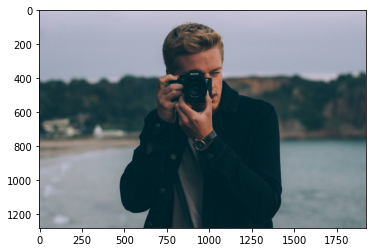

In [ ]:
#rescaling
image = img/255.0

#validating rescaling
print(f'Maximalni a minimalni hodnota v ORIGINALNIM obrazku:\nmax: {np.max(img)}\nmin: {np.min(img)}\n')
print(f'Maximalni a minimalni hodnota v RESCALOVANEM obrazku:\nmax: {np.max(image)}\nmin: {np.min(image)}')
print(f'Rozmery zustavaji stejne: {np.shape(image)}')
plt.imshow(image)

## Resizing

> změna rozměrů obrázku

> `INTER_NEAREST` - a nearest-neighbor interpolation

> `INTER_LINEAR` - a bilinear interpolation (used by default)

> `INTER_AREA` - resampling using pixel area relation. It may be a preferred method for image decimation, as it gives moire’-free results. But when the image is zoomed, it is similar to the INTER_NEAREST method.

> `INTER_CUBIC` - a bicubic interpolation over 4x4 pixel neighborhood

> `INTER_LANCZOS4` - a Lanczos interpolation over 8x8 pixel neighborhood

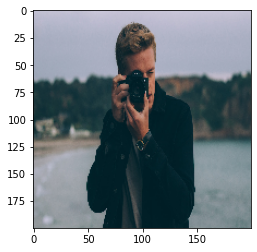

In [ ]:
import cv2
xSize =   200#@param{type:'integer'}
ySize =  200 #@param{type:'integer'}

def resize(img, sirka, vyska):
  res = cv2.resize(img, dsize=(sirka, vyska), interpolation=cv2.INTER_CUBIC) #zde menit zpusob
  return res

plt.imshow(resize(img,xSize,ySize))

## Výřez


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(1280, 1920, 3)


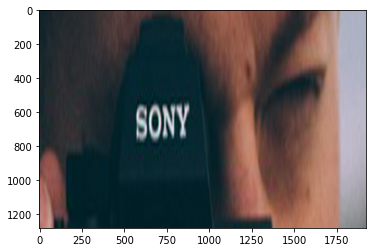

In [ ]:
print(image.shape)
#@markdown Levý horní roh výřezu
x =  800#@param {type:'integer'}
y =  350#@param {type:'integer'}
h =  50#@param {type:'integer'}
w =  300#@param {type:'integer'}
crop_img = image[y:y+h, x:x+w]

plt.imshow(resize(crop_img,image.shape[1],image.shape[0]))

## Rotace

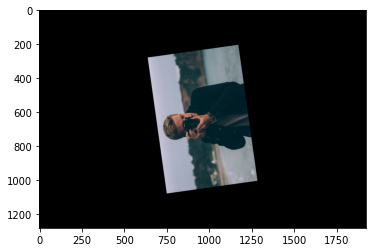

In [ ]:
def rotate(image, angle=90, scale=1.0):
        w = image.shape[1]
        h = image.shape[0]
        
        M = cv2.getRotationMatrix2D((w/2,h/2), angle, scale) #rotating matrix
        #rotate
        image = cv2.warpAffine(image,M,(w,h))
        return image
#@title {run:'auto'}

angle = 98 #@param {type:"slider", min:0, max:360, step:1}
scale = 0.42 #@param {type:"slider", min:0, max:1, step:0.01}

plt.imshow(rotate(image,angle,scale))

## Zrcadlení

> otáčení obrázků podle vodorovné nebo horizontální osy

1 - horizontal flip

0 - vertical flip

-1 - horizontal + vertical flip

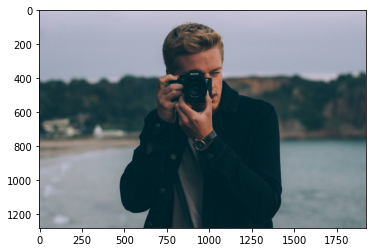

In [ ]:
plt.imshow(image)

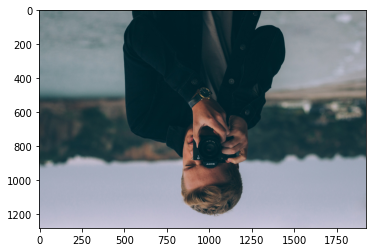

In [ ]:
def flip(image,flip):
      image = cv2.flip(image, flipCode=flip)
      return image 

flipType = "-1" #@param [1,0,-1]
plt.imshow(flip(image,int(flipType)))

## Ostření / rozmazánní

> úprava obrázku na základě masky

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


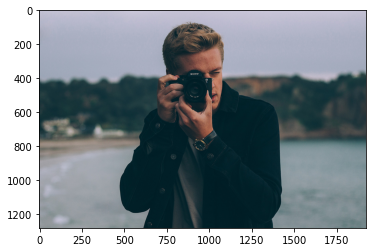

In [ ]:
maska_identity =  np.array([[0,0,0],
                            [0,1,0],
                            [0,0,0]])
maska_rozmazani = np.ones((3, 3), np.float32) / 9 #3*3=9 -->nutne aby byl obrazek stale normalizovany

maska_ostreni = np.array([[0,-1,0],
                          [-1,5,-1],
                          [0,-1,0]])


plt.imshow(cv2.filter2D(image,-1,maska_ostreni))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


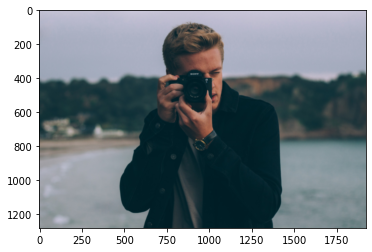

In [ ]:
#rozmazani
plt.imshow(cv2.blur(src=image, ksize=(5,5)))

## Ukládání

True

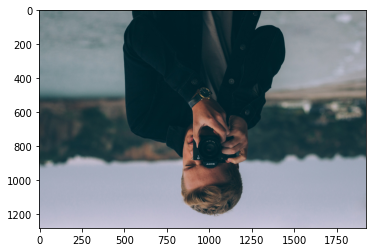

In [ ]:
pokus = flip(image,int(flipType))
plt.imshow(pokus)
cv2.imwrite('nazev.jpg', pokus)

Zdroje:

https://www.kaggle.com/hanzh0420/image-augmentation-with-opencv

https://blog.paperspace.com/data-augmentation-for-object-detection-rotation-and-shearing/